<h1><span style="color:#f95621">
CIFAR-10 <span style="color:#f95621"></h1>

CIFAR-10 dataset was downloaded from the TensorFlow library.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()


print(type(train_X), train_X.shape, test_Y.shape)

170498071/170498071 [==============================] - 7s 0us/step
<class 'numpy.ndarray'> (50000, 32, 32, 3) (10000, 1)


The test labels and train labels, stored as NumPy nd-arrays, have been flattened into one-dimensional arrays.

In [0]:
train_Y, test_Y = train_Y.flatten(), test_Y.flatten()

print(test_Y.shape)

(10000,)


### Labels
The labels in the dataset are represented as numbers from 0 to 9.

In [0]:
np.unique(train_Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Actually, these numbers represent the following 10 different classes sequentially.

In [0]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Below, an example image from each class are drawn.

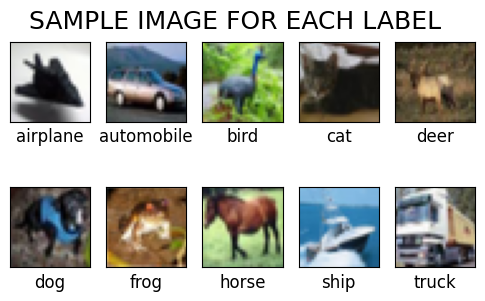

In [0]:
fig,axs=plt.subplots(2,5, figsize=(6, 3))
fig.suptitle("SAMPLE IMAGE FOR EACH LABEL", fontsize=18)
plt.subplots_adjust(hspace=0.7)
for i in range(10):
    axs[i//5, i%5].imshow(train_X[np.where(train_Y == i)[0][0]])
    axs[i//5, i%5].set_xlabel(labels[i], fontsize=12)
    axs[i//5, i%5].set(xticks=[], yticks=[])

plt.show()

### CLASS DISTRIBUTION
The class distributions in the train and test sets are represented with two bar chart.

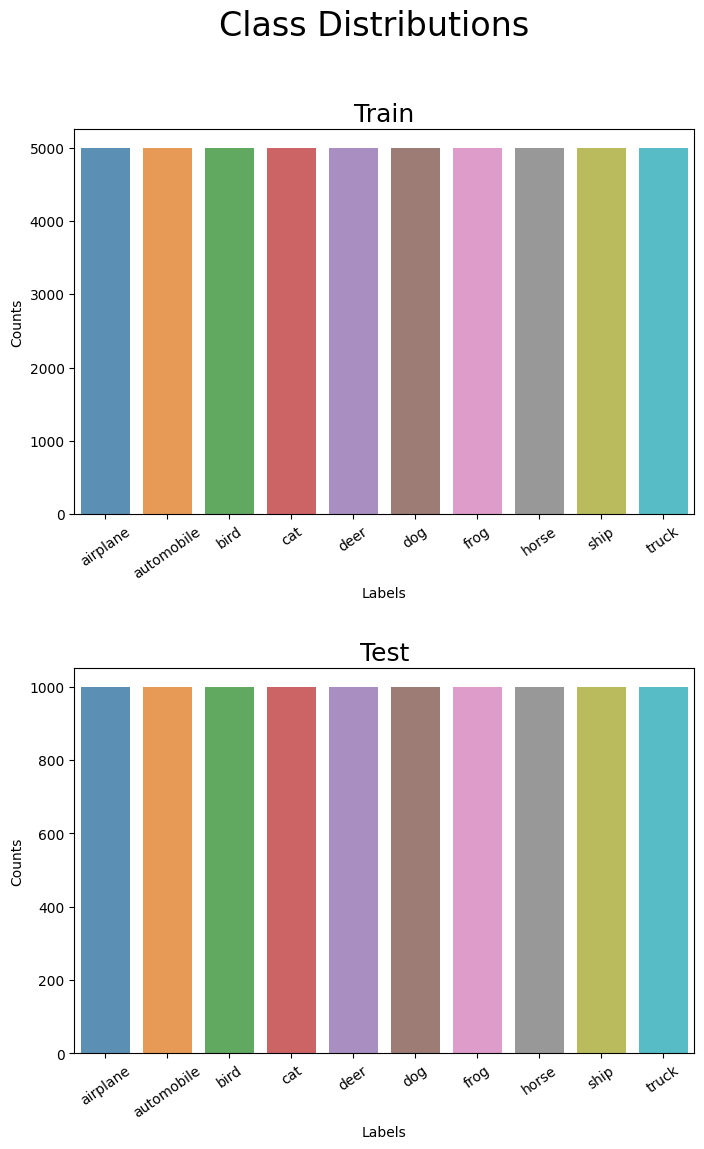

In [0]:
fig, axs=plt.subplots(2,1, figsize=(8, 12))
fig.suptitle("Class Distributions", fontsize=24)
plt.subplots_adjust(hspace=0.4)

for index, sett in enumerate([train_Y,test_Y]):
  sns.barplot(x=labels, y=np.bincount(sett), alpha=.8, ax=axs[index])
  axs[index].tick_params(axis='x', labelrotation=35)
  axs[index].set_title(['Train','Test'][index], fontsize=18)
  axs[index].set(xlabel='Labels', ylabel='Counts')
plt.show()



For each class, there are 5000 images in the training set and 1000 images in the test set. So, there is no inequality among the classes.

### Normalization
The red, green, and blue pixel values, ranging from 0 to 255, are scaled down to a range between 0 and 1 by dividing them by 255.

In [0]:
normalized_Train_X = train_X/255
normalized_Test_X = test_X/255

## VGG (Visual Geometry Group) CNN ARCHITECHURE
Initially, images with an input size of 32x32x3 are processed through 2 convolutional layers sequentially, each featuring 64 filters with a 3x3 kernel. The activation function used in the convolutional layers is ReLU. Following this, the input undergoes max-pooling, reducing its size by half. Another two convolutional layers are then applied sequentially with 128 filters, each having a 3x3 kernel, and ReLU is used as the activation function once more. Afterward, there is another max-pooling layer that further reduces the input size. The input is then flattened into a one-dimensional shape. In the subsequent dense layer, the activation function is ReLU. Finally, in the last dense layer, the inputs are classified into one of the 10 classes using the softmax activation function.

In [0]:
from tensorflow.keras import layers, models

cnn = models.Sequential([
  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  
  layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
  layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(10, activation='softmax')
])

### CNN Summary
The parameter counts and output shapes for each layer in the CNN architecture are displayed in the CNN summary.

In [0]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                   

### Compiling CNN
The CNN is compiled with the Adam optimizer, Sparse Cross-Entropy as the loss function, and Accuracy as the performance metric.

In [0]:

cnn.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


## Training with CNN for 5 Epoch
The training is carried out over 5 epochs using the CNN architecture on the normalized feature training set and the corresponding label training set.

In [0]:
TrainingProcess = cnn.fit(normalized_Train_X, train_Y, epochs=7)


Epoch 1/7
 142/1563 [=>...................

*** WARNING: max output size exceeded, skipping output. ***

1/1 [==============================] - 0s 133ms/step
INFO:tensorflow:Assets written to: /tmp/tmp97o7m_f_/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp97o7m_f_/model/data/model/assets


### Accuracy Progression Over Epochs in Training

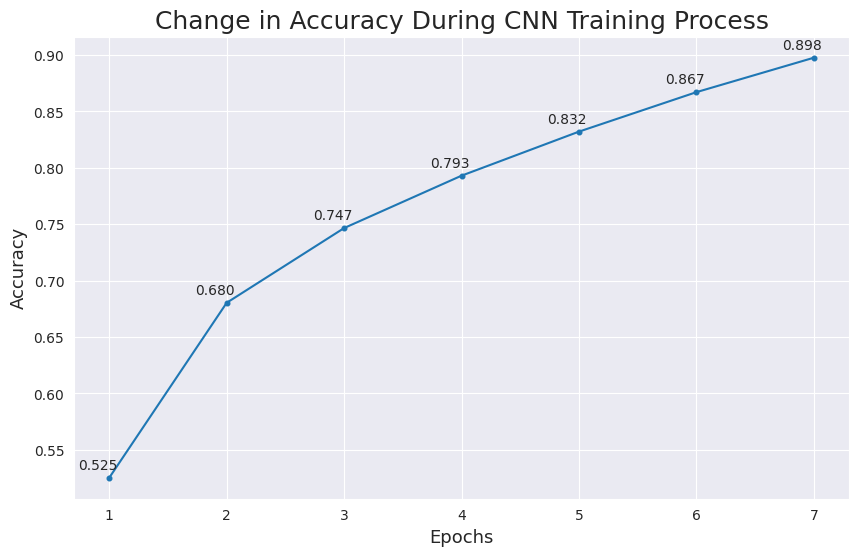

In [0]:
fig = plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.lineplot(x=range(1,8), y=TrainingProcess.history['accuracy'])

for epoch in range(7):
    accuracy = TrainingProcess.history['accuracy'][epoch]
    loss = TrainingProcess.history['loss'][epoch]
    plt.scatter(epoch+1, accuracy, color=sns.color_palette()[0], s=11)
    plt.text(epoch+0.9, accuracy + 0.005, f"{accuracy:.3f}", ha='center', va='bottom')

plt.title('Change in Accuracy During CNN Training Process', fontsize=18)
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.xticks(range(1, 8))
fig.show()

The model learns and improves during the training, and it was observed that the accuracy value steadily increased with every epoch.

### Loss Progression Over Epochs in Training

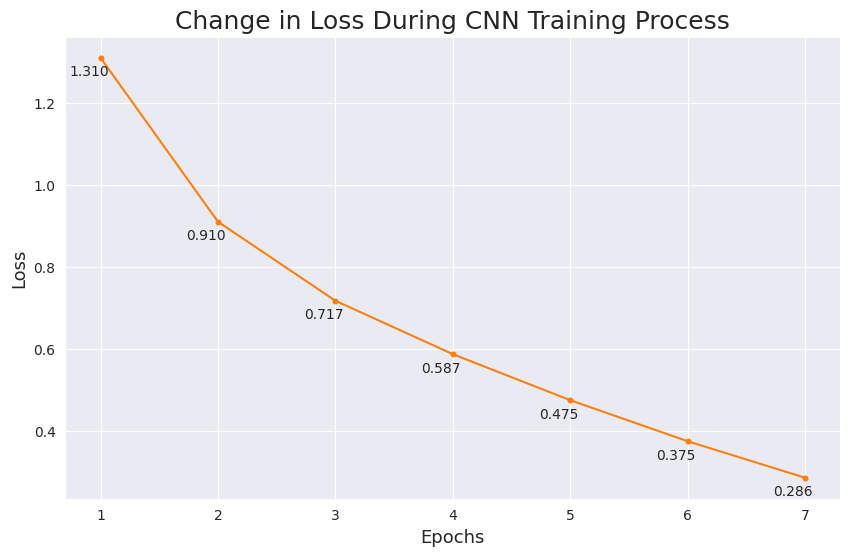

In [0]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1,8), y=TrainingProcess.history['loss'], color=sns.color_palette()[1])

for epoch in range(7):
    loss = TrainingProcess.history['loss'][epoch]
    plt.scatter(epoch+1, loss, color=sns.color_palette()[1], s=11)
    plt.text(epoch+0.9, loss - 0.017, f"{loss:.3f}", ha='center', va='top')

plt.title('Change in Loss During CNN Training Process', fontsize=18)
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.xticks(range(1, 8))
fig.show()

On the other hand, the loss value steadily decreased with each epoch.

## Evaluation
The loss and accuracy values obtained from the evaluation on the test set are displayed below.

In [0]:
Evaluation = cnn.evaluate(normalized_Test_X, test_Y)
print(Evaluation)

147/313 [=============>.......

*** WARNING: max output size exceeded, skipping output. ***

313/313 [==============================] - 24s 75ms/step - loss: 0.9315 - accuracy: 0.7534
[0.9315357208251953, 0.7534000277519226]


### Comparing Training and Test Metrics
The training and test results are compared in the group bar graph below.

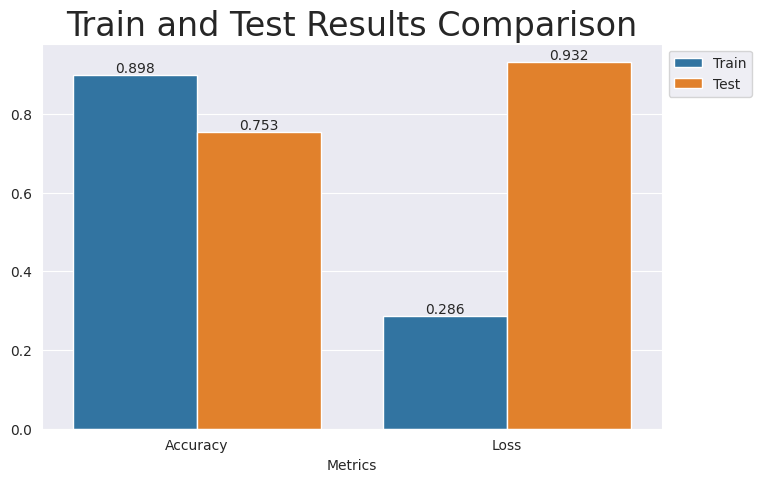

In [0]:
res = {"Metrics": ["Accuracy", "Accuracy", "Loss", "Loss"], 
        "Values": [round(i,3) for i in [TrainingProcess.history['accuracy'][-1], Evaluation[1], TrainingProcess.history['loss'][-1], Evaluation[0]]],
        "Type": ["Train", "Test", "Train", "Test"]}

df = pd.DataFrame(res)

plt.figure(figsize=(8, 5))
s = sns.barplot(data=df, x="Metrics", y="Values", hue="Type")
[s.bar_label(i,) for i in s.containers]

plt.title("Train and Test Results Comparison", fontsize=24)
plt.xlabel("Metrics")
plt.ylabel("")
plt.legend(title="",bbox_to_anchor=(1, 1))
plt.show()


### Predictions for Test Images

In [0]:
Preds = cnn.predict(normalized_Test_X)
Preds[0]

313/313 [==============================] - 23s 74ms/step


array([1.7248127e-06, 5.7987007e-05, 2.1283813e-06, 4.9941638e-01,
       9.2168402e-06, 4.9986309e-01, 6.2297989e-04, 1.0057400e-07,
       3.0445235e-06, 2.3405823e-05], dtype=float32)

### Confusion Matrix
True labels and predicted labels are compared in the confusion matrix.

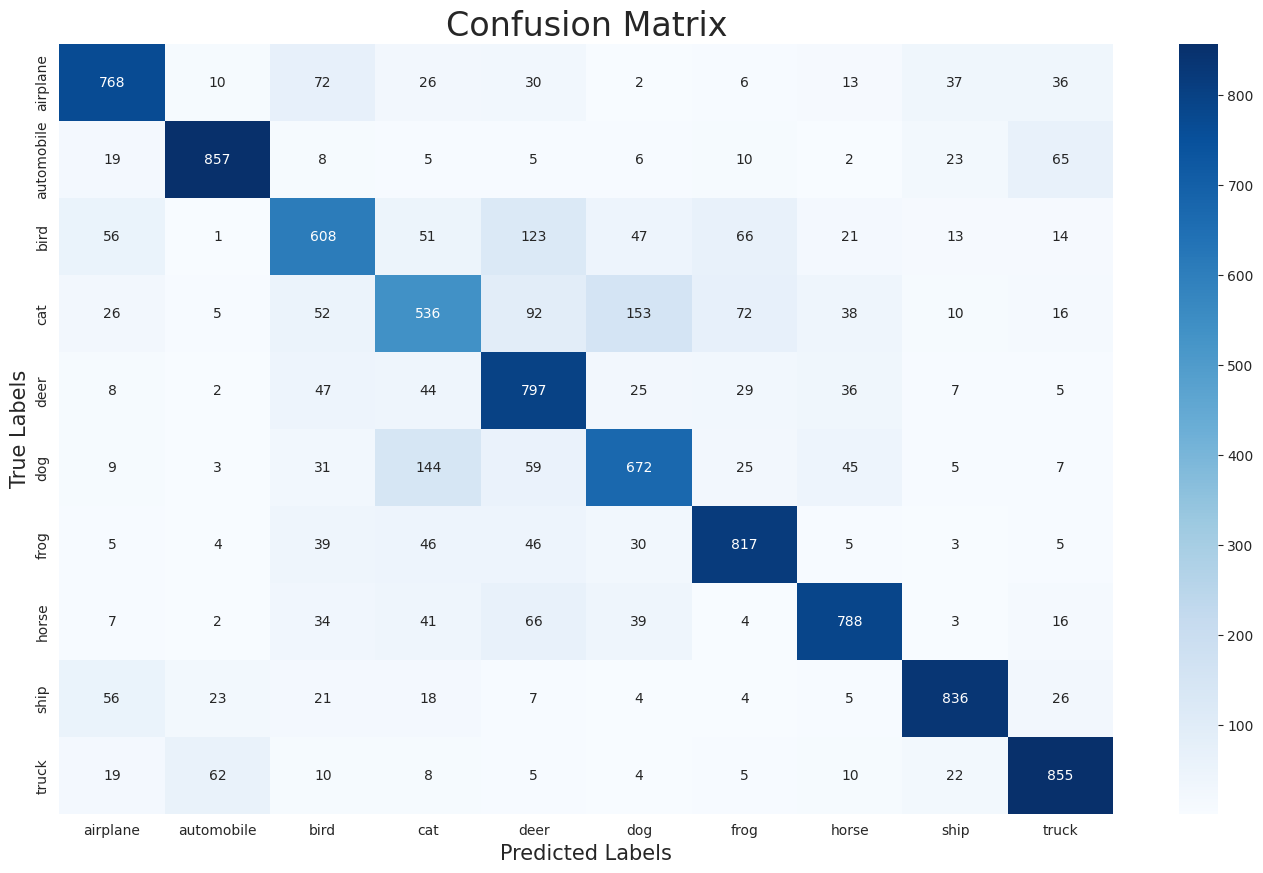

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_Y, [np.argmax(Preds[i]) for i in range(len(Preds))])

cm_with_letters = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(17, 10))
sns.heatmap(cm_with_letters, annot=True, cmap='Blues', fmt='d')

plt.xlabel("Predicted Labels", fontsize=15)
plt.ylabel("True Labels", fontsize=15)
plt.title("Confusion Matrix", fontsize=24)
plt.show()

The classes of cats and dogs are often confused, while the classes of car and truck are the most accurately predicted. Among the animal classes, the frog, with a structure distinct from the others, is the most accurately predicted.

### Accuracy For Each Classes
Accuracy values have been calculated separately for each class.

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer

PredictionsForEachLabels = [[] for _ in range(10)]
for i in range(len(Preds)):
    PredictionsForEachLabels[test_Y[i]].append(np.argmax(Preds[i])) 
#                     < Actual Value >        < Predicted Value >

AccuracyForEachLabels = []
for l in range(10):
    actual_values = [l]*len(PredictionsForEachLabels[l])
    AccuracyForEachLabels.append(accuracy_score(actual_values, PredictionsForEachLabels[l]))

AccuracyForEachLabels = dict(zip(labels, AccuracyForEachLabels))
print(AccuracyForEachLabels)

{'airplane': 0.768, 'automobile': 0.857, 'bird': 0.608, 'cat': 0.536, 'deer': 0.797, 'dog': 0.672, 'frog': 0.817, 'horse': 0.788, 'ship': 0.836, 'truck': 0.855}


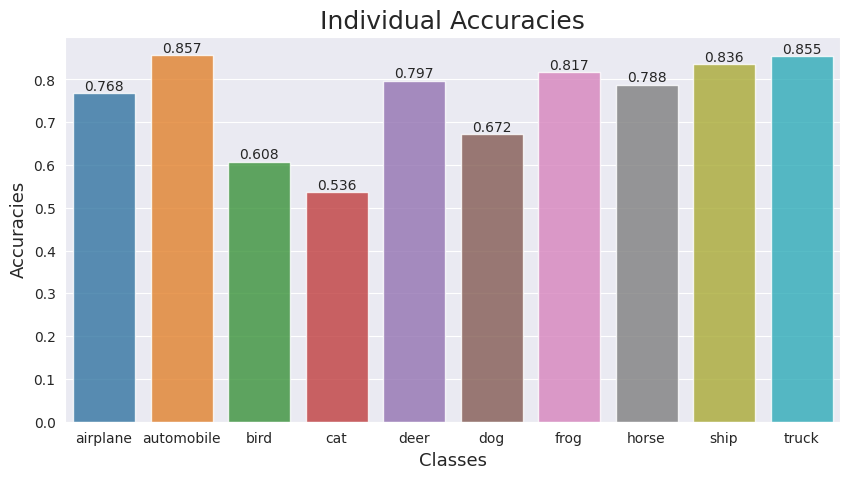

In [0]:
fig = plt.figure(figsize=(10,5))
#plt.ylim(0.9995, 1.0)

s = sns.barplot(x=labels, y=list(AccuracyForEachLabels.values()), alpha=.8)
[s.bar_label(i,) for i in s.containers]

plt.title('Individual Accuracies', fontsize=18)
plt.xlabel("Classes", fontsize=13)
plt.ylabel("Accuracies", fontsize=13)
plt.show()

The accuracy values range from 0.5 to 0.85, as observed in the bar graph.

### Weighted Accuracy

Weighted accuracy is calculated by taking individual accuracy values and weights for classes.

In [0]:
Weighted_Accuracy = round(sum([AccuracyForEachLabels[l]*len(test_Y)/10 for l in labels])/len(test_Y), 3)
print(Weighted_Accuracy)

0.753


### ROC CURVES
ROC curves and AUC scores for each class are displayed below.

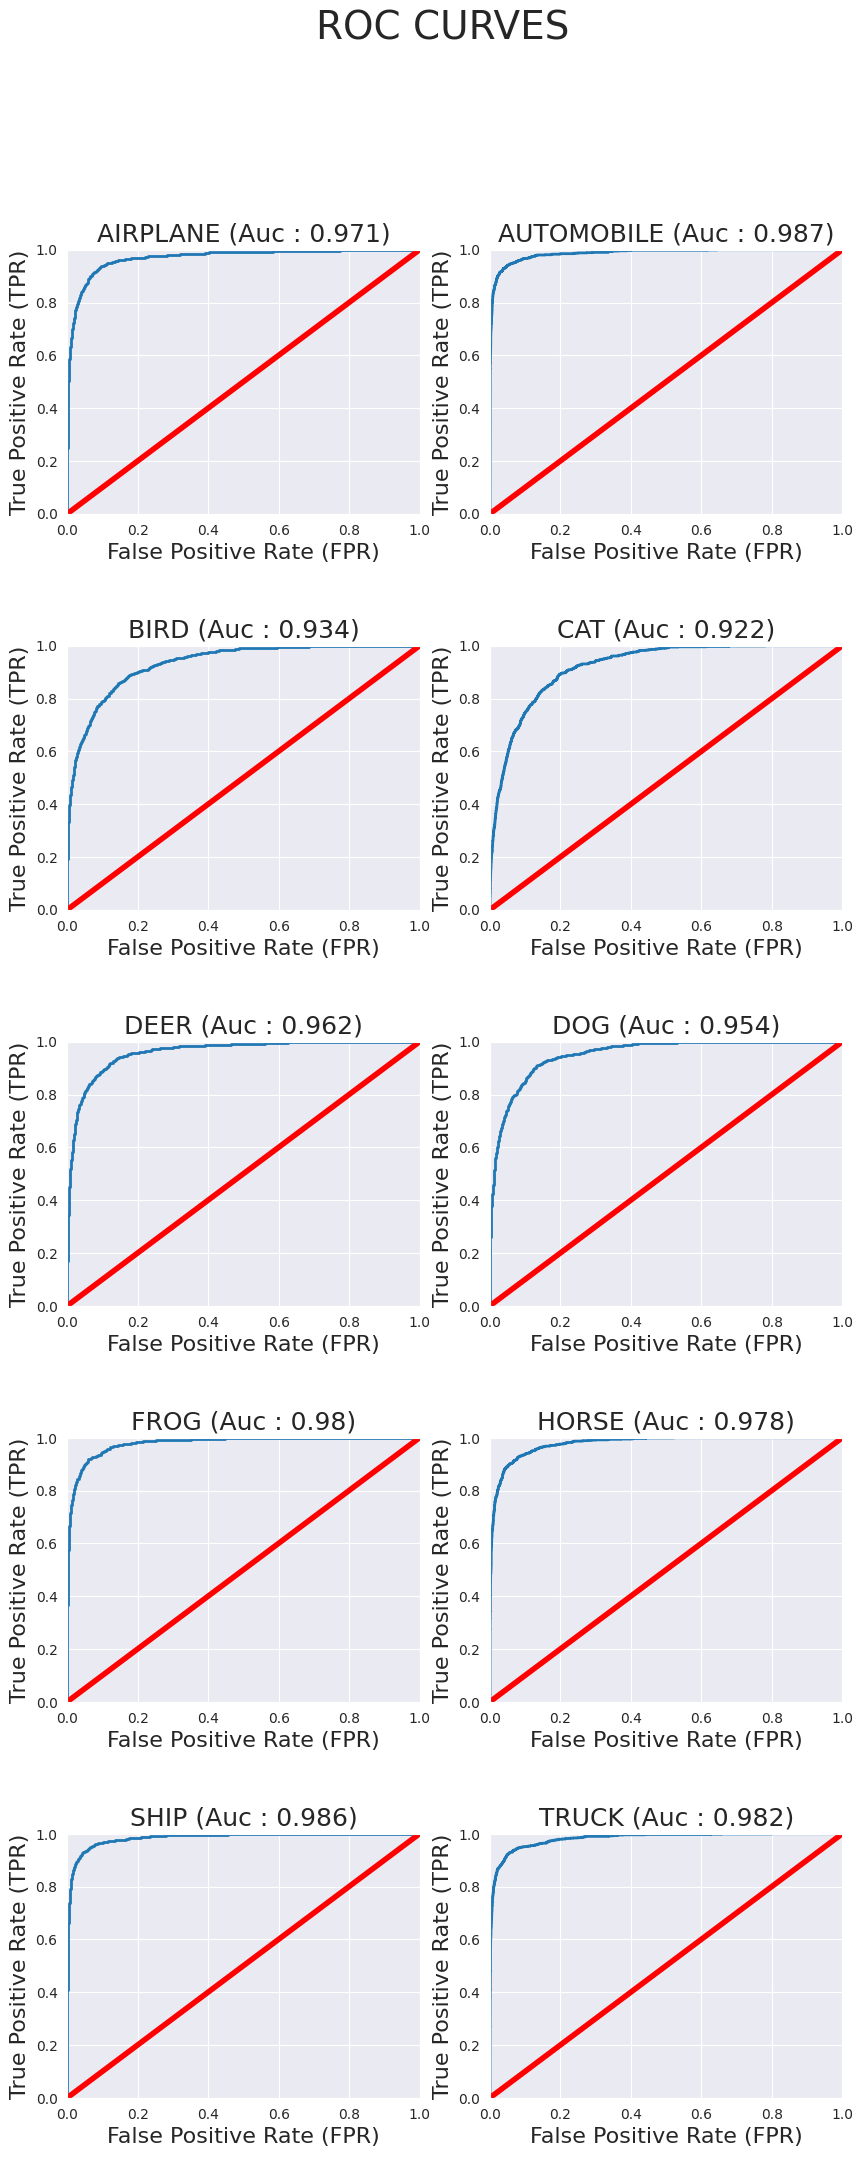

In [0]:

from sklearn.metrics import roc_curve, auc

fig,axs=plt.subplots(5,2, figsize=(10, 24))
fig.suptitle("ROC CURVES", fontsize=28)
plt.subplots_adjust(hspace=0.5)

for i in range(10):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, Preds[:,i], pos_label=i)
    auc_score = auc(false_positive_rate, true_positive_rate)

    axs[i // 2, i % 2].plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
    axs[i // 2, i % 2].plot([0, 1], [0, 1], 'r', linewidth=4)
    axs[i // 2, i % 2].axis([0, 1, 0, 1])
    axs[i // 2, i % 2].set_xlabel('False Positive Rate (FPR)', fontsize=16)
    axs[i // 2, i % 2].set_ylabel('True Positive Rate (TPR)', fontsize=16)
    axs[i // 2, i % 2].set_title(labels[i].upper()+" (Auc : "+str(round(auc_score,3))+")", fontsize=18)

plt.show()

The model attained high AUC scores for each class, all surpassing 0.9, with values ranging from 0.92 to 0.98. This not only underscores the success of the study but also indicates the model's potential for achieving high accuracy with new images.

##CONCLUSION
In conclusion, the dataset, comprising an equal number of images for 10 classes, was trained using a Visual Geometry Group Convolutional Neural Network model. The model demonstrated a commendable performance, achieving an accuracy of 75.34%. Additionally, high AUC values were obtained for each class, ranging from 0.92 to 0.98, further indicating the effectiveness of the trained model across diverse categories.